In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score

In [2]:
df = pd.read_csv('processed_data.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_to_income,income_to_loan,net_disposable_income
0,-0.972715,0,4,-0.125715,0,3,4.025004,4,1.682992,0.49,-0.739351,-1.420299,0,1,3.977801,-0.642400,-0.197890
1,-1.141929,0,3,-1.067987,0,2,-1.359230,1,0.044832,0.08,-0.997275,-2.551210,1,0,-0.669340,0.031205,-1.056489
2,-0.465073,0,3,-1.065523,3,0,-0.646611,3,0.625573,0.44,-0.739351,0.047901,0,1,3.469891,-0.628845,-1.063470
3,-0.803501,0,1,-0.002455,0,3,4.025004,3,1.417798,0.44,-0.997275,0.841522,0,1,3.431590,-0.627712,-0.069798
4,-0.634287,1,4,-0.217516,1,3,4.025004,3,1.095537,0.53,-0.481428,-0.924286,0,1,4.468374,-0.653341,-0.280317


In [4]:
X = df[['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']]
y = df['loan_status']

In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# train random forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# prediction
y_pred = random_forest.predict(X_test)

In [8]:
# accuracy and cross valudation of random forest
accuracy = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(random_forest, X, y, cv=5)

accuracy, np.mean(cross_val)

(0.9285476164018224, 0.9230773338501146)

In [30]:
# grid search parameter
param_grid = {
    'n_estimators': [500, 1000, 1500],       
    'max_depth': [20, 30, None],            
    'max_features': ['sqrt'],               
    'min_samples_split': [10, 15],          
    'min_samples_leaf': [2, 5],             
    'bootstrap': [True]                    
}
# grid search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [27]:
# model train
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, None],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [10, 15],
                         'n_estimators': [500, 1000, 1500]},
             scoring='accuracy', verbose=2)

In [28]:
# prediction
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [29]:
# accuracy and cross valudation of random forest after hypertunnuning
accuracy = accuracy_score(y_test, y_pred)
cross_val = cross_val_score(best_rf, X, y, cv=5)
accuracy, np.mean(cross_val)

(0.9285476164018224, 0.9219215708465397)

## Model Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
# claddification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7002
           1       0.90      0.77      0.83      1997

    accuracy                           0.93      8999
   macro avg       0.92      0.87      0.89      8999
weighted avg       0.93      0.93      0.93      8999



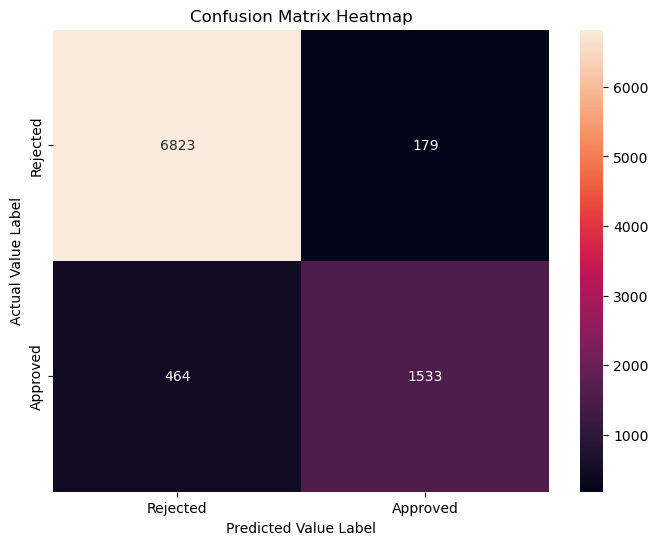

In [55]:
# heatmap with confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted Value Label')
plt.ylabel('Actual Value Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# save the model to local directory
pickle.dump(pipe_ridge, open('ridge_model.pkl', 'wb'))